# 1. Gradient Descent 최적화 구현

In [1]:
import numpy as np

## 1)분석적 방법(Analytical method)인 경우

### 1. 손실함수 정의 

In [3]:
def loss_function(x):
    return 0.1*x**4 - 1.5*x**3 + 0.6*x**2 + 1.0*x + 20.0

#이라고 이미 식을 알고 있는 경우, 

### 2. 손실 함수 미분 정의

In [4]:
def df_loss_function(x):
    return 0.4*x**3 -4.5*x**2 + 1.2*x + 1.0

### 3. 하이퍼 파라미터 정의

In [5]:
x = 5
eps = 1e-5
learning_rate = 0.01
epochs = 1000


### 4. Gradient Descent (손실함수가 가장 작게 되는 것을 얻기 위한 )알고리즘

In [6]:
min_x = x #초기화
min_y = loss_function(min_x) #초기화

for _ in range(epochs):
    gradient = df_loss_function(x)
    new_x = x - learning_rate * gradient
    y = loss_function(new_x)
    
    if min_y > y:
        min_x = new_x
        min_y = y
        
    #언제까지 할거냐 x와 new_x의 차이가 eps보다 작으면 멈춘다. 
    if np.abs(x - new_x) < eps:
        break
    #아니면
    x = new_x

In [7]:
print(min_x, min_y)

10.955323272631201 -428.84677390087836


In [14]:
##알고리즘 합수로 만들기 (모듈화)
##그리고 gradient Descent 진행 동안 변화한 x값을 저장


def gradientDescent(initial_x, epoch=1000, learning_late=0.01, eps=1e-5):
    x = initial_x
    x_log = [x]
    
    min_x = initial_x
    min_y = loss_function(min_x)
    
    for _ in range(epochs):
        grad = df_loss_function(min_x)
        new_x = x - learning_rate*grad
        y = loss_function(new_x)
        
        x_log.append(new_x)
        
        if min_y > y:
            min_x = new_x
            min_y = y
            
        if np.abs(x-min_x) < eps:
            break
            
        x = new_x
        
    return min_x, min_y, x_log


### 5. Gradient Descent 알고리즘 visualization

In [17]:
min_x1, min_y1, x_log1 = gradientDescent(initial_x = 5)
min_x2, min_y2, x_log2 = gradientDescent(initial_x = -5)

##그리고 gradient Descent 진행 동안 변화한 y값도 저장
y_log1 = loss_function(np.array(x_log1))
y_log2 = loss_function(np.array(x_log2))



In [18]:
#본적적으로 x_log와 y_log1, y_log2를 시각화
import matplotlib.pyplot as plt

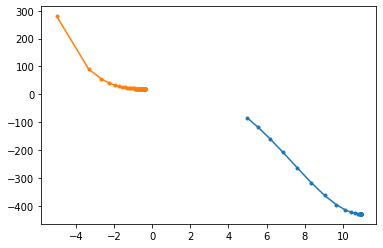

In [19]:
plt.plot(x_log1, y_log1, '.-')
#'.-' : 각각의 데이터는 .으로, 그 사이는 -로 이어준다는 의미이다. 
plt.plot(x_log2, y_log2, '.-')

plt.show() #지금까지 그린 모든 것을 출력한다. 